# Estimation of rates of random events

*Antonino Ingargiola*  -- tritemio AT gmail.com <br>
**ORCID** [0000-0002-9348-1397](orcid.org/0000-0002-9348-1397) <br>
**twitter** [@tritemio_sc](https://twitter.com/tritemio_sc) <br>

Date: April 2016


## Abstract

<p class='lead'> In this notebook I explore properties of different 
estimators of "rate" for random events generated by a Poisson processs.
The initial reason was computing the rate of photon detection
events (for example in single-molecule spectrocopy measurements),
but the treatment is general and valid for any Poisson process.</p>

# The Model

Let's assume that $\{d_i\}$ is a set of $n$ samples distributed as $D \sim\operatorname{Exp}(\lambda)$.

Then, the can construct $m = n + 1$ times of random events $\{t_i\}$ as:

$$t_0 = 0, \quad t_i = \sum_{j=0}^{i-1} d_j \quad\textrm{for}\quad i > 1$$

These events are stochastic, statistically independent and have a fixed rate $\lambda$.

# Problem: how to estimate $\lambda$ from $\{t_i\}$?

Given $\{t_i\}$ we can trivially compute $\{d_i\}$ as:

$$d_i = t_{i+1} - t_i$$

Instead of $\lambda$, we can directly estimate $\tau = 1/\lambda$:

$$\hat{\tau} = \frac{1}{n}\sum_{i=0}^{n-1} d_i = \frac{T_n}{n}$$

The estimator $\hat{\tau} \sim \frac{1}{n}\operatorname{Erlang}(n, \lambda)$.
The Erlang distribution has mean $n/\lambda$ and variance $n/\lambda^2$.

Note that:

$$\hat{\tau} \sim \frac{1}{n}\operatorname{Erlang}(n, \lambda) = \operatorname{Erlang}(n, n\,\lambda)$$

thus, $\hat{\tau}$ has mean $1/\lambda$ and variance $1/(n \lambda)^2$, i.e.
it is an unbiased estimator of $1/\lambda$.

However, the fact the $\hat{\tau}$ is an unbiased estimator of $1/\lambda$ 
does not mean that $1/\hat{\tau}$ is an unbiased estimator of $\lambda$.
Indeed, as shown in the next section,  the unbiased estimator of the rate is:

$$\hat\lambda_u = \frac{n-1}{T_n}$$ 


It can be shown that $\hat{\lambda}_u$ has also the minimum variance among the
unbiased estimators (i.e. it is a minimum variance unbiased estimator, MVUE)
of the rate (see [Lehmann-Scheffé theorem](https://en.wikipedia.org/wiki/Lehmann%E2%80%93Scheff%C3%A9_theorem)
and [Rao–Blackwell theorem](https://en.wikipedia.org/wiki/Rao%E2%80%93Blackwell_theorem)).

## MLE estimator of the rate

For our sample of $n$ observations from an Exponential distribution, 
the likelihood function is

$$L(\lambda) = \prod_{i=1}^n f(d_i;\lambda) = \prod_{i=1}^n \lambda\, e^{-\lambda d_i}$$

$$\log L(\lambda) = \sum_{i=1}^n \log (\lambda\, e^{-\lambda d_i} ) = 
n\log(\lambda) - \lambda \sum_{i=1}^n d_i = 
n\log(\lambda) - \lambda T_n$$

Taking the first derivative and setting it to 0 we obtain:

$$\frac{\rm d}{{\rm d}\lambda} \log L(\lambda) = 
\frac{n}{\lambda} - T_n = 0$$

$$\Rightarrow\quad \hat{\lambda}_{MLE} = \frac{n}{T_n} = \frac{n}{\sum_{i=1}^n d_i}$$

## Minimum MSE estimator

Given an estimator $\Lambda_n$ (a R.V.), we define the mean square error (MSE) as:

$$\epsilon(\Lambda_n) = \mathrm{E}\{ (\Lambda_n - \lambda)^2 \} = 
\mathrm{Var}\{ \Lambda_n\} + (\mathrm{E}\{\Lambda_n\} - \lambda)^2$$

In general the minimum MSE (MMSE) estimator is defined as:

$$\hat{\lambda}_{MSE} = \operatorname*{arg\,min}_{\Lambda_n} \epsilon(\Lambda_n)$$

If $\Lambda_n$ has the form:

$$\Lambda_{n,c} = \frac{n - c}{T_n}$$

we need to find $c$ that minimizes $\epsilon(\Lambda_{n,c})$.
It can be shown that the minimum is achieved for $c=2$

To derive this result use the expression for $\mathrm{Var}\{ \Lambda_{n,c}\}$
derived in [Appendix 2](#Appendix-2.-Variance-of-the-rate-estimators).

## Family of estimators

We consider the  family of estimators 

$$\Lambda_{n,c} = \frac{n - c}{T_n}$$

where $T_n = \sum d_i \sim \textrm{Erlang}(\lambda, n)$ and $c < n$.  We can write:

$$\textrm{Erlang PDF:}\quad f(x \:|\: n, \lambda) = 
\frac{\lambda^n x^{n-1} e^{-\lambda x}}{(n-1)!\,}$$

$$\mathrm{E}\{\Lambda_{n,c}\} = \int \frac{n - c}{x} \, f(x \:|\: n, \lambda)\, dx
= (n - c) \int \frac{1}{x}\,f(x \:|\: n, \lambda)\, dx
= (n - c) \int \frac{\lambda^n x^{n-2} e^{-\lambda x}}{(n-1)!\,}\, dx 
= \frac{(n - c)\lambda^n}{(n-1)!} \int x^{n-2} e^{-\lambda x}\, dx $$

Knowing that (see [Appendix 1](#Appendix-1.-Computation-of-integral-"A")):

$$ \int_0^{+\infty} x^{n-2} e^{-\lambda x}\, dx  = \frac{(n-2)!}{\lambda^{n-1}}\qquad\qquad \textrm{(A)}$$

we find that:

$$\mathrm{E}\{\Lambda_{n,c}\} = (n - c)\frac{\lambda}{n-1} = \overline{\Lambda}_{n,c}$$

Note that 

- for $c=1$ we obtain the unbiased estimator ($\overline{\Lambda}_{n,c} = \lambda$). 
- for $c=0$ we obtain the MLE estimator derived in a previous section. 
- for $c=2$ we obtain the minimum MSE (MMSE) estimator introduced in a previous section. 

Furthermore, from simluations (see below), I found that for $c=1/3$ the estimator
has median equal to the rate $\lambda$. This result should not be difficult
to prove analytically.

# Simulation of rate estimators

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [2]:
n = 5                  # number of delays
num_times = n + 1      # number of timestamps
λ = 1000               # simulated rate 
num_iter = 100 * 1000

In [3]:
np.random.seed(2)
d1 = np.random.exponential(scale=1/λ, size=(num_iter * n)).reshape(num_iter, n)
t = np.cumsum(d1, axis=1)

assert np.allclose(np.cumsum(d1, axis=1), t)

We $n$ delays, exponentially distributed with a fixed rate. Their cumulative sum (the times) will not have a sharp cut-off: 

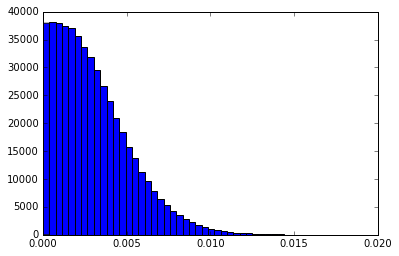

In [4]:
plt.hist(t.ravel(), bins=50);

The delays are exponential by construction:

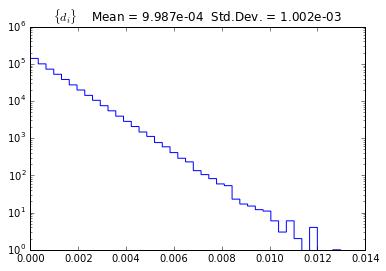

In [5]:
plt.hist(d1.ravel(), bins=40, histtype='step');
plt.yscale('log')
plt.title('$\{d_i\}\quad$ Mean = %.3e  Std.Dev. = %.3e ' % (d1.mean(), d1.std()));

Here we compare a set of estimators:

$$\hat{\Lambda}_{n,c} = \frac{n - c}{T_n}$$

       c      n     Mean      Std       MSE    Median    % > λ
   -1.00      5  1.50453    87.45%  100.962%    1.285    71.58%
    0.00      5  1.25377    72.88%   77.169%    1.071    55.91%
    0.33      5  1.17019    68.02%   70.115%    0.999    49.93%
    1.00      5  1.00302    58.30%   58.302%    0.857    37.33%
    2.00      5  0.75226    43.73%   50.256%    0.642    18.67%
    3.00      5  0.50151    29.15%   57.747%    0.428     5.39%
  median      5  1.94845   201.57%  222.769%    1.449    73.71%


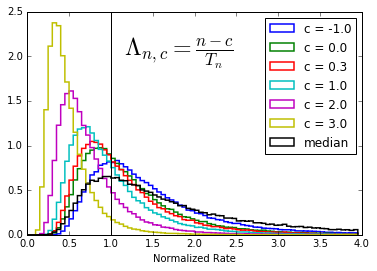

In [6]:
kws = dict(bins=np.arange(0, 4, 0.05), histtype='step', lw=1.5, normed=True)
print('{:>8} {:>6} {:>8} {:>8}  {:>8}  {:>8} {:>8}'
      .format('c', 'n', 'Mean', 'Std', 'MSE', 'Median', '% > λ'))
for c in (-1, 0, 1/3, 1, 2, 3):
    r_hc = (n - c)  / d1.sum(axis=1) / λ
    r_hc_err_rms = np.sqrt(np.mean(((r_hc - 1)**2)))
    plt.hist(r_hc, **kws, label = 'c = %.1f' % c);
    print('%8.2f %6d %8.5f %8.2f%% %8.3f%% %8.3f %8.2f%%' % 
          (c, n, r_hc.mean(), r_hc.std()*100, r_hc_err_rms*100, np.median(r_hc),
           (r_hc > 1).sum() * 100 / num_iter))
    
r_hm = 1/np.median(d1, axis=1) / λ
r_hm_err_rms = np.sqrt(np.mean(((r_hm - 1)**2)))
plt.hist(r_hm, **kws, label = 'median');
print('%8s %6d %8.5f %8.2f%% %8.3f%% %8.3f %8.2f%%' % 
      ('median', n, r_hm.mean(), r_hm.std()*100, r_hm_err_rms*100, np.median(r_hm),
       (r_hm > 1).sum() * 100 / num_iter))
plt.xlabel('Normalized Rate')
plt.axvline(1, color='k');
plt.legend()
plt.text(0.35, 0.75, r'$\Lambda_{n,c} = \frac{n - c}{T_n}$',
         fontsize=24, transform=plt.gcf().transFigure);

We can observe that:

- with $c = 2$ we obtain the mean square error (MSE) in estimating the rate,
- with $c = 1$ we obtained the unbiased estimator of the rate (but higher MSE error),
- with $c = 0$, we obtain the MLE estimator,
- with $c = 1/3$, the estimator has median equal to the true rate ($\lambda$).

By contrast, when estimating $\tau = \lambda^{-1}$,
the MVUE is the empirical mean of the delays ($\hat{\tau}$).
The distribution of $\hat{\tau}$ is shown below:

     n     Mean      Std   Err.RMS    Median  % > 1/λ
     5  0.99867    44.72%   44.725%    0.934    44.09%


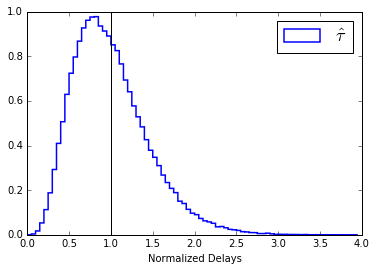

In [7]:
kws = dict(bins=np.arange(0, 4, 0.05), histtype='step', lw=1.5, normed=True)
print('{:>6} {:>8} {:>8}  {:>8}  {:>8} {:>8}'
      .format('n', 'Mean', 'Std', 'Err.RMS', 'Median', '% > 1/λ'))
d_h = np.mean(d1, axis=1) * λ
d_h_err_rms = np.sqrt(np.mean(((d_h - 1)**2)))
plt.hist(d_h, **kws, label = r'$\hat\tau$');
print('%6d %8.5f %8.2f%% %8.3f%% %8.3f %8.2f%%' % 
      (n, d_h.mean(), d_h.std()*100, d_h_err_rms*100, np.median(d_h),
      (d_h > 1).sum() * 100 / num_iter))
plt.legend(fontsize=18)
plt.xlabel('Normalized Delays')
plt.axvline(1, color='k');

Let's see how $\lambda_{MLE} = n\,/\,T_n$ converges:

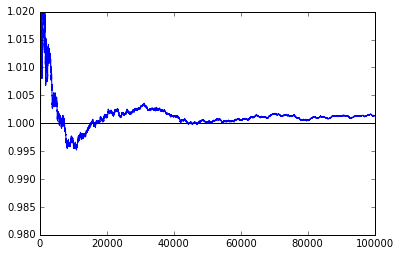

In [8]:
rate_t = 1 / ((d1.mean(axis=1)).cumsum() / np.arange(1, num_iter+1)) / λ

plt.plot(rate_t[100:])
plt.ylim(0.98, 1.02)
plt.axhline(1, color='k');

Let's see how $\hat{\lambda}_u = (n - 1)/T_n$ converges:

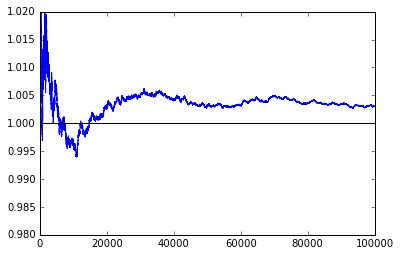

In [9]:
rate_t2 = ((n - 1) / d1.sum(axis=1)).cumsum() / np.arange(1, num_iter+1) / λ

plt.plot(rate_t2[100:])
plt.ylim(0.98, 1.02)
plt.axhline(1, color='k');

In both cases there is convergence to $\lambda$, because
all the family of estimators $\Lambda_{n,c}$ is 
[asymptotically unbiased](https://en.wikipedia.org/wiki/Estimator#Consistency). 
However, when only $m$ times 
(or $n = m - 1$ delays) are available to estimate $\lambda$, 
the only unbiased estimator is $\hat{\lambda}_u = (n-1)/T_n$.

# Appendix 1. Computation of integral "A"

Here we want to compute the integral:

$$ \int_0^{\infty} x^{n-2} e^{-\lambda x}\, dx $$

In principle, this can be computed pen & paper using part integration,
variable substitution and the definition of 
[lower incomplete gamma function](https://en.wikipedia.org/wiki/Incomplete_gamma_function).
However, I'm too lazy to do it. So I'll use computer-assisted
symbolyc calculus despite somebody thinks this is shameful:

In [10]:
from sympy import integrate, Symbol, factorial, exp, gamma
import sympy
sympy.init_printing()
import numpy as np

In [11]:
n = Symbol('n')
x = Symbol('x')
lam = Symbol('\lambda')

In [12]:
f = x**(n-2) * exp(-lam*x)
f

In [13]:
r = integrate(f, (x, 0, np.inf))
sympy.simplify(r)

noticing that $\gamma$ is the [lower incomplete gamma function](https://en.wikipedia.org/wiki/Incomplete_gamma_function), 
and from its definition it evaluates to:

$$\gamma(n-1, 0) = 0$$

$$\gamma(n-1, \infty) = \Gamma(n-1) = (n-2)!$$

Therefore, we derive the result:

$$ \int_0^{\infty} x^{n-2} e^{-\lambda x}\, dx  = \frac{(n-2)!}{\lambda^{n-1}}\qquad\qquad \textrm{(A)}$$


Finally, note that $n$ is the number of delays, while the number of times/events is $m = n+1$.

# Appendix 2. Variance of the rate estimators

We want to compute the variance for the family of rate estimators $\Lambda_{n,c}$ defined as

$$\Lambda_{n,c} = \frac{n-c}{T_n}$$

where $T_n = \sum d_i$ is the sum of the $n$ delays, and $c$ is a real parameter with $c < n$.

We start by writing:

$$\mathrm{Var}\{\Lambda_{n,c}\} = \mathrm{E}\left\{(\Lambda_{n,c} - \mathrm{E}\{\Lambda_{n,c}\})^2 \right\} 
= \int \left( \Lambda_{n,c}  - \overline{\Lambda}_{n,c} \right)^2 f(x \:|\: n, \lambda)\, dx
= \int \left(\frac{n - c}{x} - (n - c)\frac{\lambda}{n-1} \right)^2 f(x \:|\: n, \lambda)\, dx =$$

$$= (n-c)^2 \int \left(\frac{1}{x} - \frac{\lambda}{n-1} \right)^2 f(x \:|\: n, \lambda)\, dx$$

For brevity, let's define:

$$\left(\frac{1}{x} - \frac{\lambda}{n-1} \right)^2 = \left(\frac{1}{x^2} + \left(\frac{\lambda}{n-1}\right)^2 
-2 \frac{\lambda}{x(n-1)})\right)
= \left(\frac{1}{x^2} + a + \frac{b}{x} \right)$$

From **term 2**:

$$(n-c)^2 \int a \, f(x \:|\: n, \lambda)\, dx = a (n-c)^2 = (n-c)^2\left( \frac{\lambda}{n-1} \right)^2$$

From **term 1**:

$$(n-c)^2 \int \frac{1}{x^2} \, f(x \:|\: n, \lambda)\, dx
= (n - c)^2 \int \frac{\lambda^n x^{n-3} e^{-\lambda x}}{(n-1)!\,}\, dx 
= \frac{(n - c)^2\lambda^n}{(n-1)!} \int x^{n-3} e^{-\lambda x}\, dx 
= \frac{(n - c)^2\lambda^n}{(n-1)!} \frac{(n-3)!}{\lambda^{n-2}} =$$

$$= \frac{(n - c)^2\lambda^2}{(n-1)(n-2)}$$

And from **term 3**:

$$(n-c)^2 \int \frac{b}{x} \, f(x \:|\: n, \lambda)\, dx
= b(n - c)^2 \int \frac{\lambda^n x^{n-2} e^{-\lambda x}}{(n-1)!\,}\, dx 
= \frac{b(n - c)^2\lambda^n}{(n-1)!} \int x^{n-2} e^{-\lambda x}\, dx 
= \frac{b(n - c)^2\lambda^n}{(n-1)!} \frac{(n-2)!}{\lambda^{n-1}} =$$

$$= \frac{b(n - c)^2\lambda}{(n-1)} = -\frac{2\lambda}{n-1} \frac{(n - c)^2\lambda}{(n-1)}
= -2 \frac{(n - c)^2\lambda^2}{(n-1)^2}$$

Summing these 3 terms we obtain the variance:

$$\mathrm{Var}\{\Lambda_{n,c}\} = \lambda^2(n-c)^2\left[ \frac{1}{n-1} + \frac{1}{n-2} - 2 \frac{1}{n-1}\right]
= \lambda^2(n-c)^2\left[\frac{1}{n-2} - \frac{1}{n-1}\right]$$

# References

- [Random: Chapter 6. Point Estimation](http://www.math.uah.edu/stat/point/index.html)
- http://www.amstat.org/publications/jse/v9n1/elfessi.html
- Any statistcs book explaining RV parameter's estimators, MLE, MMSE and MVUE.